In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
import joblib

In [3]:
final_pipeline = joblib.load("gradientboost_pipeline.joblib")

In [4]:
stress_data = pd.read_csv(r"Housing-project-test-data.csv")

In [8]:
stress_data["GarageYrBlt"] = stress_data["GarageYrBlt"].fillna(0)
stress_data["GarageType"] = stress_data["GarageType"].fillna("None")
stress_data["GarageFinish"] = stress_data["GarageFinish"].fillna("None")
stress_data["GarageQual"] = stress_data["GarageQual"].fillna("None")
stress_data["GarageCond"] = stress_data["GarageCond"].fillna("None")
stress_data["BsmtQual"] = stress_data["BsmtQual"].fillna("None")
stress_data["BsmtCond"] = stress_data["BsmtCond"].fillna("None")
stress_data["FireplaceQu"] = stress_data["FireplaceQu"].fillna("None")
stress_data["PoolQC"] = stress_data["PoolQC"].fillna("None")
stress_data["Fence"] = stress_data["Fence"].fillna("None")
stress_data["BsmtFinType2"] = stress_data["BsmtFinType2"].fillna("None")
stress_data["BsmtFinType1"] = stress_data["BsmtFinType1"].fillna("None")
stress_data["MasVnrType"] = stress_data["MasVnrType"].fillna("None")
stress_data["MiscFeature"] = stress_data["MiscFeature"].fillna("None")
stress_data["BsmtExposure"] = stress_data["BsmtExposure"].fillna("None")
stress_data["Alley"] = stress_data["Alley"].fillna("None")
print(stress_data["LotFrontage"].skew())
stress_data["LotFrontage"] = stress_data["LotFrontage"].fillna(stress_data["LotFrontage"].median())
print(stress_data["MasVnrArea"].skew())
stress_data["MasVnrArea"] = stress_data["MasVnrArea"].fillna(stress_data["MasVnrArea"].median())

0.42974380624133895
1.9734507929252854


In [11]:
predictions = final_pipeline.predict(stress_data)
predictions = np.expm1(predictions)
print(predictions)

[307771.19141447 200593.66722444 238746.92805048 180984.39678278
 197192.1370844   96211.9423506  134994.94956125 275834.43668065
 254540.9020665  149569.23461265  86887.74345553 138422.86625262
 118704.04250203 201231.97149055 285346.8189734  127388.34545675
 114172.32216342 120288.58897396 167468.70540523 201878.16843859
 153358.57626838 144141.532105   140920.02792054  83470.53186865
  99645.1308831  124841.63931115 177349.10173137 145326.73215741
 175675.85424413  99713.40236243 135682.98427199 187402.78319548
 230395.38428644 166197.3946972  111240.68508801 161473.91649923
 192333.98709171 111606.56026208 171589.36658925 146719.14962762
 101560.87223197 311263.48504908 192875.88990459 187057.63391034
 132972.90990897 126308.00389329 128313.26939387  99104.48187441
 212760.75341267 230111.17349813 137363.44792434 198117.99734778
  98722.03449049 107840.14300583 275527.0346013  130423.79821623
 137714.6059981  175886.00275271 111391.48312307 245468.20006484
 105155.43730013 193088.5

In [16]:
temp_data = stress_data.copy()
temp_data["Predicted_SalePrice"] = predictions

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
temp_data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_SalePrice
91,681,120,RL,50.0,8012,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,543,BLQ,119,261,923,GasA,TA,Y,SBrkr,923,0,0,923,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1980.0,RFn,1,264,TA,TA,Y,80,0,0,0,0,0,None,None,None,0,5,2010,WD,Normal,140492.907438
275,217,20,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,266.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,946,Unf,0,490,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,1,0,2,0,3,1,Gd,8,Typ,0,None,Attchd,2004.0,Unf,2,484,TA,TA,Y,139,98,0,0,0,0,None,None,None,0,4,2008,WD,Normal,196709.794577
255,140,60,RL,65.0,15426,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,821,Unf,0,107,928,GasA,Ex,Y,SBrkr,928,836,0,1764,1,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,1997.0,RFn,2,470,TA,TA,Y,276,99,0,0,0,0,None,MnPrv,None,0,8,2009,WD,Normal,206324.907429
12,423,20,RL,100.0,21750,Pave,None,Reg,HLS,AllPub,Inside,Mod,Mitchel,Artery,Norm,1Fam,1Story,5,5,1954,1954,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,988,988,GasA,Ex,Y,FuseA,988,0,0,988,0,0,1,0,2,1,TA,4,Typ,0,None,Attchd,1954.0,RFn,2,520,TA,TA,N,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Normal,118704.042502
251,159,60,FV,100.0,12552,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,222,Unf,0,769,991,GasA,Ex,Y,SBrkr,991,956,0,1947,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,678,TA,TA,Y,0,136,0,0,0,0,None,GdWo,None,0,5,2010,WD,Normal,233008.361859
279,528,60,RL,67.0,14948,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3,858,TA,TA,Y,126,66,0,0,0,0,None,None,None,0,11,2008,New,Partial,334662.563501
3,1148,70,RL,75.0,12000,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,7,2009,WD,Normal,180984.396783
183,960,160,FV,24.0,2572,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,1999,1999,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,604,Unf,0,92,696,GasA,Ex,Y,SBrkr,696,720,0,1416,1,0,2,1,3,1,Gd,6,Typ,0,None,Detchd,1999.0,Unf,2,484,TA,TA,Y,0,44,0,0,0,0,None,None,None,0,5,2010,WD,Normal,165473.440463
78,818,20,RL,65.0,13265,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,None,None,None,0,7,2008,WD,Normal,247179.644715
197,1000,20,RL,64.0,6762,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,N

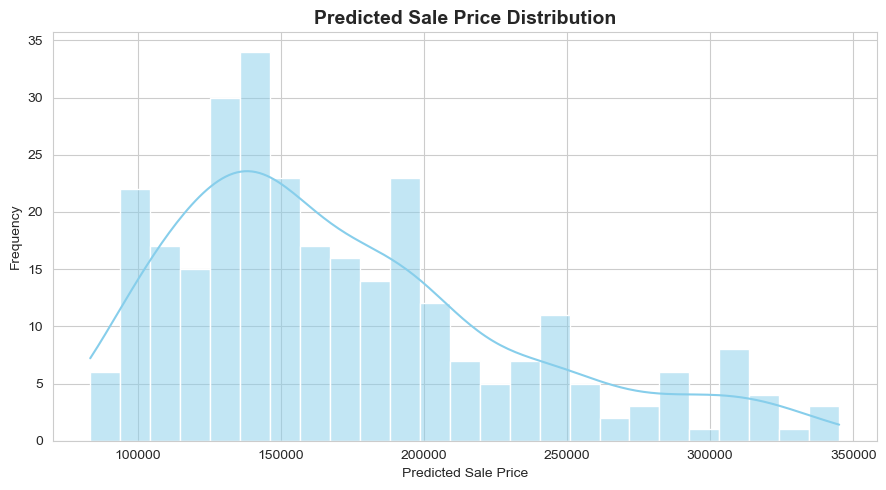

In [20]:
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
sns.histplot(predictions, kde=True, color="skyblue", bins=25)
plt.title("Predicted Sale Price Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()